<a href="https://colab.research.google.com/github/knockcat/Brain-Tumor-Detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:

import warnings
warnings.filterwarnings('ignore')


# Install and Import Dependencies

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil         # used for performing high level operations on files
import glob          # used to return all file paths that match a specific pattern

In [30]:
# count the number of images in different classes
root_dir = "/content/gdrive/MyDrive/Brain Tumor Prediction/Dataset"
no_of_images = {}

for dir in os.listdir(root_dir):
  no_of_images[dir] = len(os.listdir(os.path.join(root_dir, dir)))

no_of_images.items()

dict_items([('yes', 1500), ('no', 1500)])

In [31]:
def dataFolder(p, split):
  if not os.path.exists("/content/gdrive/MyDrive/Brain Tumor Prediction/"+p):
    os.mkdir("/content/gdrive/MyDrive/Brain Tumor Prediction/"+p)

    for dir in os.listdir(root_dir):
      os.makedirs("/content/gdrive/MyDrive/Brain Tumor Prediction/"+p+"/" +dir)

      for img in np.random.choice(a = os.listdir(os.path.join(root_dir,dir)),
                                  size = (math.floor(split*no_of_images[dir])-5),
                                  replace = False):
        O = os.path.join(root_dir,dir,img)
        D = os.path.join("/content/gdrive/MyDrive/Brain Tumor Prediction/"+p, dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print( f"{p} Folder already exists!")

In [36]:
dataFolder("Train",0.7)

Train Folder already exists!


In [39]:
dataFolder("Test",0.15)

Test Folder already exists!


In [35]:
dataFolder("Validation",0.15)

Validation Folder already exists!


In [40]:
no_of_images = {}


for dir in os.listdir(root_dir):
  no_of_images[dir] = len(os.listdir(os.path.join(root_dir, dir)))

no_of_images.items()

dict_items([('yes', 205), ('no', 205)])

# **Model Building**


In [41]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [42]:
# CNN Model

model = Sequential()

model.add(Conv2D(filters= 16, kernel_size= (3,3), activation= 'relu', input_shape= (224,224,3)))

model.add(Conv2D(filters= 36, kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(units= 1, activation= 'sigmoid'))         # used to add non-linearity in model

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 36)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)      

In [43]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'] )

# Preparing Data

In [44]:
def preprocessingImages1(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True)
  image = image_data.flow_from_directory(directory = path, target_size=(224,224), batch_size= 32, class_mode= 'binary')

  return image

In [46]:
path = "/content/gdrive/MyDrive/Brain Tumor Prediction/Train"
train_data = preprocessingImages1(path)

Found 2090 images belonging to 2 classes.


In [47]:

def preprocessingImages2(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data = ImageDataGenerator(rescale= 1/255)
  image = image_data.flow_from_directory(directory = path, target_size=(224,224), batch_size= 32, class_mode= 'binary')

  return image


In [51]:
path = "/content/gdrive/MyDrive/Brain Tumor Prediction/Test"
test_data = preprocessingImages2(path)

Found 60 images belonging to 2 classes.


In [52]:

path = "/content/gdrive/MyDrive/Brain Tumor Prediction/Validation"
val_data = preprocessingImages2(path)

Found 440 images belonging to 2 classes.


In [53]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# early stopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 6, verbose= 1, mode= 'auto')
# model check point
mc = ModelCheckpoint(monitor= 'val_accuracy', filepath="/content/gdrive/MyDrive/Brain Tumor Prediction/bestmodel.h5", verbose= 1, save_best_only= True, mode= 'auto')

cd = [es, mc]

# Model Training

In [54]:
hs = model.fit_generator(generator= train_data,
                         steps_per_epoch= 10, epochs= 20,
                         verbose= 1, validation_data= val_data, validation_steps= 210, callbacks= cd)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.8814 - accuracy: 0.5781


Epoch 1: val_accuracy improved from -inf to 0.71591, saving model to /content/gdrive/MyDrive/Brain Tumor Prediction/bestmodel.h5
10/10 [==============================] - 114s 12s/step - loss: 0.8814 - accuracy: 0.5781 - val_loss: 0.5890 - val_accuracy: 0.7159
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.6250 - accuracy: 0.7031

10/10 [==============================] - 62s 6s/step - loss: 0.6250 - accuracy: 0.7031
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.5999 - accuracy: 0.6844

10/10 [==============================] - 61s 6s/step - loss: 0.5999 - accuracy: 0.6844
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.5588 - accuracy: 0.7000

10/10 [==============================] - 63s 6s/step - loss: 0.5588 - accuracy: 0.7000
Epoch 5/20
10/10 [==============================] - ETA: 0s - loss: 0.5695 - accuracy: 0.7156

10/10 [==============================] - 62s 6s/step - loss: 0.5695 - accuracy: 0.7156
Epoch 6/20
10/10 [==============================] - ETA: 0s - loss: 0.5333 - accuracy: 0.7383

10/10 [==============================] - 57s 5s/step - loss: 0.5333 - accuracy: 0.7383
Epoch 7/20
10/10 [==============================] - ETA: 0s - loss: 0.4992 - accuracy: 0.7188

10/10 [==============================] - 63s 6s/step - loss: 0.4992 - accuracy: 0.7188
Epoch 8/20
10/10 [==============================] - ETA: 0s - loss: 0.4728 - accuracy: 0.7651

10/10 [==============================] - 57s 6s/step - loss: 0.4728 - accuracy: 0.7651
Epoch 9/20
10/10 [==============================] - ETA: 0s - loss: 0.5073 - accuracy: 0.7500

10/10 [==============================] - 67s 7s/step - loss: 0.5073 - accuracy: 0.7500
Epoch 10/20
10/10 [==============================] - ETA: 0s - loss: 0.5197 - accuracy: 0.7500

10/10 [==============================] - 65s 6s/step - loss: 0.5197 - accuracy: 0.7500
Epoch 11/20
10/10 [==============================] - ETA: 0s - loss: 0.4395 - accuracy: 0.8000

10/10 [==============================] - 61s 6s/step - loss: 0.4395 - accuracy: 0.8000
Epoch 12/20
10/10 [==============================] - ETA: 0s - loss: 0.4885 - accuracy: 0.7656

10/10 [==============================] - 61s 6s/step - loss: 0.4885 - accuracy: 0.7656
Epoch 13/20
10/10 [==============================] - ETA: 0s - loss: 0.4593 - accuracy: 0.8094

10/10 [==============================] - 61s 6s/step - loss: 0.4593 - accuracy: 0.8094
Epoch 14/20
10/10 [==============================] - ETA: 0s - loss: 0.3811 - accuracy: 0.8438

10/10 [==============================] - 64s 6s/step - loss: 0.3811 - accuracy: 0.8438
Epoch 15/20
10/10 [==============================] - ETA: 0s - loss: 0.4186 - accuracy: 0.8250

10/10 [==============================] - 63s 6s/step - loss: 0.4186 - accuracy: 0.8250
Epoch 16/20
10/10 [==============================] - ETA: 0s - loss: 0.4347 - accuracy: 0.7906

10/10 [==============================] - 61s 6s/step - loss: 0.4347 - accuracy: 0.7906
Epoch 17/20
10/10 [==============================] - ETA: 0s - loss: 0.4310 - accuracy: 0.8188

10/10 [==============================] - 56s 6s/step - loss: 0.4310 - accuracy: 0.8188
Epoch 18/20
10/10 [==============================] - ETA: 0s - loss: 0.3991 - accuracy: 0.8281

10/10 [==============================] - 63s 6s/step - loss: 0.3991 - accuracy: 0.8281
Epoch 19/20
10/10 [==============================] - ETA: 0s - loss: 0.3856 - accuracy: 0.8281

10/10 [==============================] - 62s 6s/step - loss: 0.3856 - accuracy: 0.8281
Epoch 20/20
10/10 [==============================] - ETA: 0s - loss: 0.3813 - accuracy: 0.8221

10/10 [==============================] - 57s 6s/step - loss: 0.3813 - accuracy: 0.8221


In [55]:
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

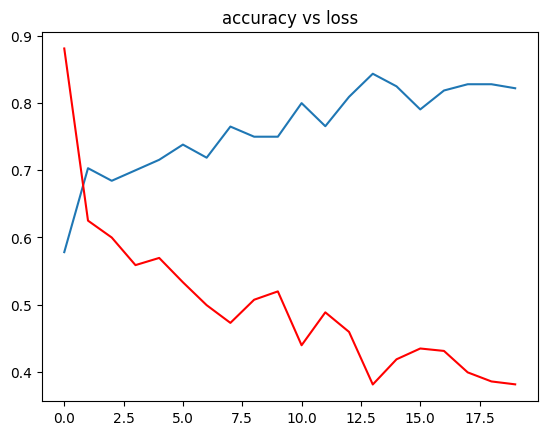

In [56]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['loss'], c = "red")
plt.title("accuracy vs loss")
plt.show()

# Load Model

In [62]:
from keras.models import load_model

model = load_model("/content/gdrive/MyDrive/Brain Tumor Prediction/bestmodel.h5")

In [63]:
acc = model.evaluate_generator(test_data)[1]
print(f"Accuracy {acc}")

Accuracy 0.7166666388511658


In [65]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [66]:
from keras_preprocessing.image import load_img, img_to_array

# Make Predictions

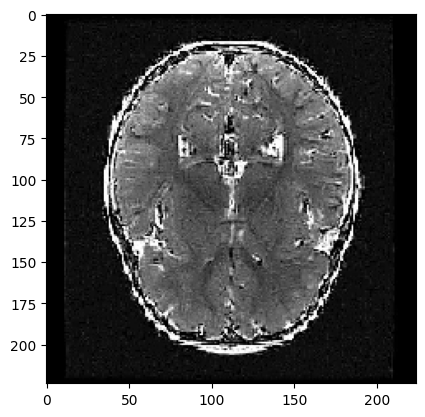

1/1 [==============================] - 0s 113ms/step
0
The MRI image doesn't have a Tumor


In [83]:
path = "/content/gdrive/MyDrive/Brain Tumor Prediction/Dataset2/no/no221.jpg"
img_yes = load_img(path, target_size=(224,224))
img_array_yes = img_to_array(img_yes)/255

plt.imshow(img_array_yes)
plt.show()

img_array_yes = np.expand_dims(img_array_yes, axis=0)
prediction1 = model.predict(img_array_yes)[0][0]
class1 = np.round(prediction1).astype(int)
print(class1)
if class1 == 0:
  print("The MRI image doesn't have a Tumor")
else:
  print("The MRI image has a tumor")

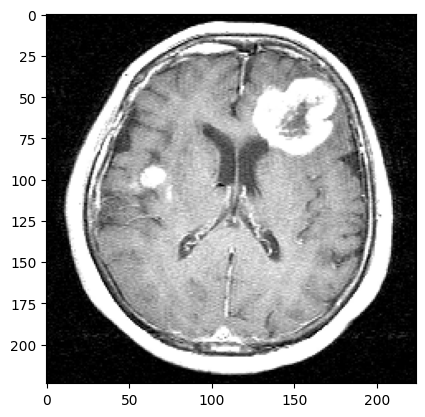

1/1 [==============================] - 0s 113ms/step
1
The MRI image has a tumor


In [84]:
path = "/content/gdrive/MyDrive/Brain Tumor Prediction/Dataset2/yes/y661.jpg"
img_yes = load_img(path, target_size=(224,224))
img_array_yes = img_to_array(img_yes)/255

plt.imshow(img_array_yes)
plt.show()

img_array_yes = np.expand_dims(img_array_yes, axis=0)
prediction2 = model.predict(img_array_yes)[0][0]
class2 = np.round(prediction2).astype(int)
print(class2)
if class2 == 0:
  print("The MRI image doesn't have a Tumor")
else:
  print("The MRI image has a tumor")
